<a href="https://colab.research.google.com/github/Maithraanand/Financial-Machine-Learning-FML-/blob/main/FML_Derivative_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


**Load the Dataset**

In [ ]:
df = pd.read_csv('derivative pricing.csv', encoding='ascii')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

   Underlying Asset Price  Strike Price (Exercise Price)  \
0                   125.5                            120   
1                    98.2                            100   
2                    54.1                             50   
3                    76.9                             75   
4                    33.4                             30   

  Expiration Date (Maturity Date)  Volatility of the Underlying Asset  \
0                      2024-03-16                                0.25   
1                      2024-06-15                                0.15   
2                      2024-09-10                                0.30   
3                      2024-12-12                                0.20   
4                      2025-03-11                                0.40   

   Interest Rate (Risk-Free Rate)  Dividend Yield (if applicable)  \
0                            0.02                            0.03   
1                            0.01                            0

In [ ]:
df = pd.get_dummies(df, drop_first=True)

**Preparing the data for regression**

In [ ]:
# Selecting relevant numerical features for the regression model
features = df[['Underlying Asset Price', 'Strike Price (Exercise Price)', 'Volatility of the Underlying Asset',
               'Interest Rate (Risk-Free Rate)', 'Dividend Yield (if applicable)', 'Time to Maturity',
               'Futures Price (for Futures Contracts)', 'Cost of Carry']]

target = df['Implied Volatility (for Options)']

**Training and Testing**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
predictions = model.predict(X_test)

**Calculate MSE & R2**

In [ ]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error:', mse)
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.0005704551814209683
R-squared: 0.48


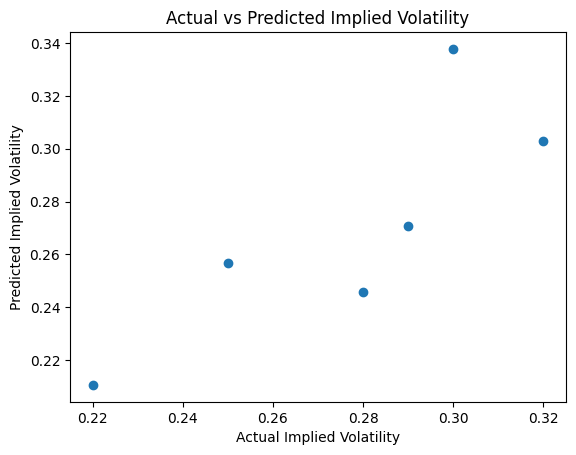

In [ ]:
# Plot actual vs predicted prices
plt.scatter(y_test, predictions)
plt.xlabel("Actual Implied Volatility")
plt.ylabel("Predicted Implied Volatility")
plt.title("Actual vs Predicted Implied Volatility")
plt.show()
